## Setup

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import urllib.request
import datetime as dt
%pylab inline
pylab.rcParams['figure.figsize'] = (12, 8)

Populating the interactive namespace from numpy and matplotlib


In [2]:
ZHVI_FILE = 'Zip_Zhvi_SingleFamilyResidence.csv'
ZHVI_URL = 'http://files.zillowstatic.com/research/public/Zip/' + ZHVI_FILE
ZHVI_FP = './data/' + ZHVI_FILE

### (Optional) Refresh Data

In [3]:
urllib.request.urlretrieve(ZHVI_URL, ZHVI_FP);

## Bay Area SFH Prices

In [4]:
df = pd.read_csv(ZHVI_FP)
metros = ['San Francisco', 'San Jose']
df = df[df['Metro'].isin(metros)]

### Metros

In [5]:
df2 = df.groupby('Metro').aggregate(np.median).iloc[:, df.columns.get_loc('1996-04'):]
df2.columns = df2.columns.map(lambda x: dt.datetime.strptime(x, '%Y-%m'))

In [6]:
df2.columns

DatetimeIndex(['1996-08-01', '1996-09-01', '1996-10-01', '1996-11-01',
               '1996-12-01', '1997-01-01', '1997-02-01', '1997-03-01',
               '1997-04-01', '1997-05-01',
               ...
               '2017-01-01', '2017-02-01', '2017-03-01', '2017-04-01',
               '2017-05-01', '2017-06-01', '2017-07-01', '2017-08-01',
               '2017-09-01', '2017-10-01'],
              dtype='datetime64[ns]', length=255, freq=None)

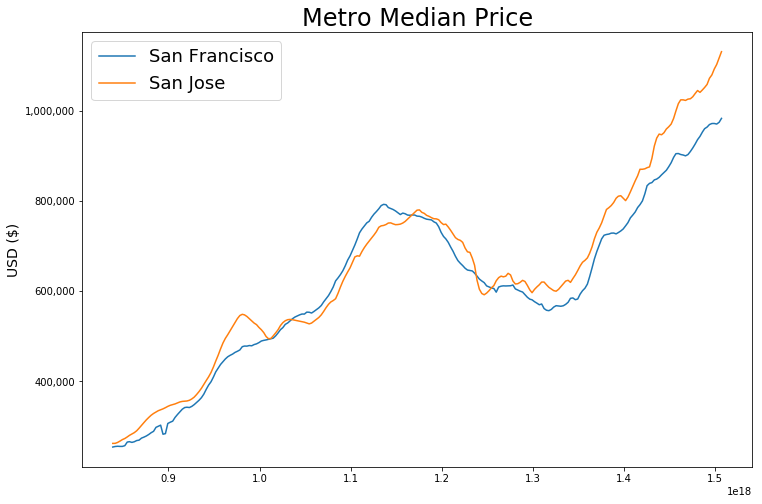

In [7]:
plt.figure()
ax = plt.subplot(111)
ax.plot(
    df2.columns, df2.loc['San Francisco', :].values,
    df2.columns, df2.loc['San Jose', :].values)
ax.legend(metros, prop={'size': 18})
ax.set_ylabel('USD ($)', fontsize=14)
ax.get_yaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ax.set_title('Metro Median Price', fontsize=24)
plt.show()

### County

In [8]:
df.head()

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-01,2017-02,2017-03,2017-04,2017-05,2017-06,2017-07,2017-08,2017-09,2017-10
6,97564,94109,San Francisco,CA,San Francisco,San Francisco,7,NaN,NaN,NaN,...,4002900,3940200,3915600,3908700,3911600,3945800,3967400,3925100,3870100,3851400
22,97771,94565,Pittsburg,CA,San Francisco,Contra Costa,23,123800.0,123300.0,123100.0,...,377300,380700,382800,385200,388700,390400,391500,395400,400900,405500
47,97711,94501,Alameda,CA,San Francisco,Alameda,48,224600.0,226200.0,226200.0,...,955900,969500,977800,978300,975200,972900,971400,967900,970700,978600
52,97565,94110,San Francisco,CA,San Francisco,San Francisco,53,NaN,NaN,NaN,...,1366300,1376600,1392900,1405500,1409300,1417400,1427400,1429200,1420400,1412000
153,97743,94536,Fremont,CA,San Francisco,Alameda,154,223100.0,223900.0,224400.0,...,952000,961600,969200,970200,970300,972600,974200,974200,979200,986300


In [9]:
df["CountyName"].unique()

array(['San Francisco', 'Contra Costa', 'Alameda', 'Santa Clara',
       'San Mateo', 'Marin', 'San Benito'], dtype=object)

In [10]:
countys = ['San Francisco', 'Contra Costa', 'Alameda', 'Santa Clara', 'San Mateo', 'Marin', 'San Benito']
df = df[df['CountyName'].isin(countys)]

In [11]:
df3 = df.groupby('CountyName').aggregate(np.median).iloc[:, df.columns.get_loc('1996-04'):]
df3.columns = df3.columns.map(lambda x: dt.datetime.strptime(x, '%Y-%m'))

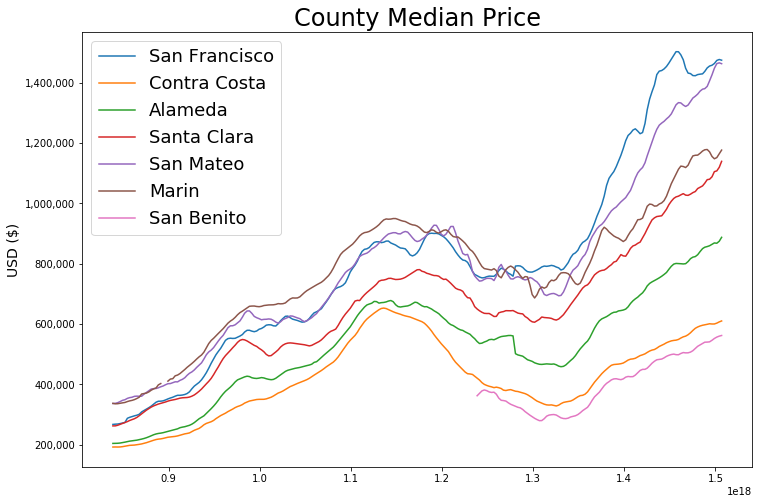

In [14]:
plt.figure()
ax = plt.subplot(111)
ax.plot(
    df3.columns, df3.loc['San Francisco', :].values,
    df3.columns, df3.loc['Contra Costa', :].values,
    df3.columns, df3.loc['Alameda', :].values,
    df3.columns, df3.loc['Santa Clara', :].values,
    df3.columns, df3.loc['San Mateo', :].values,
    df3.columns, df3.loc['Marin', :].values,
    df3.columns, df3.loc['San Benito', :].values,)

ax.legend(countys, prop={'size': 18})
ax.set_ylabel('USD ($)', fontsize=14)
ax.get_yaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ax.set_title('County Median Price', fontsize=24)
plt.show()